In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import wrangle
from scipy.stats import norm
import statistics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

np.random.seed(123)

In [2]:
df = wrangle.wrangle_zillow()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2,3633,296425,2005,6941,6037
6,3,4,1620,847770,2011,10244,6037
7,3,2,2077,646760,1926,7924,6037
11,0,0,1200,5328,1972,91,6037
14,0,0,171,6920,1973,255,6037


In [22]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [13]:
def split_zillow(df):
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    return train, validate, test

In [43]:
train, validate, test = wrangle.split_zillow(df)
train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1567873,3,1,1248,191578,1950,2712,6037
1218138,2,2,1326,1345206,1950,16539,6037
339661,2,1,1053,356648,1953,4575,6037
1017133,3,2,1256,175069,1946,2635,6037
40250,3,2,1640,543000,1957,6344,6059
...,...,...,...,...,...,...,...
941799,2,1,696,27699,1954,918,6037
631585,3,3,2081,619590,1987,7319,6037
883917,3,2,1742,196237,1957,2512,6037
1253096,4,3,2066,617344,1924,7650,6037


In [44]:
#1.
train_scaled = train.copy()

In [45]:
# make, fit, use:
columns_to_scale = ['bedroomcnt', 'bathroomcnt','taxamount', 'calculatedfinishedsquarefeet']
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [46]:
train.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

In [47]:
train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1567873,0.200000,0.03125,0.001309,191578,1950,0.002510,6037
1218138,0.133333,0.06250,0.001391,1345206,1950,0.015335,6037
339661,0.133333,0.03125,0.001104,356648,1953,0.004238,6037
1017133,0.200000,0.06250,0.001317,175069,1946,0.002439,6037
40250,0.200000,0.06250,0.001721,543000,1957,0.005879,6059


Text(0, 0.5, 'Count')

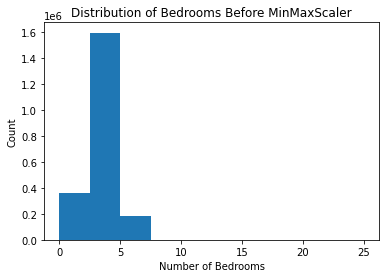

In [48]:
plt.hist(df.bedroomcnt)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [49]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

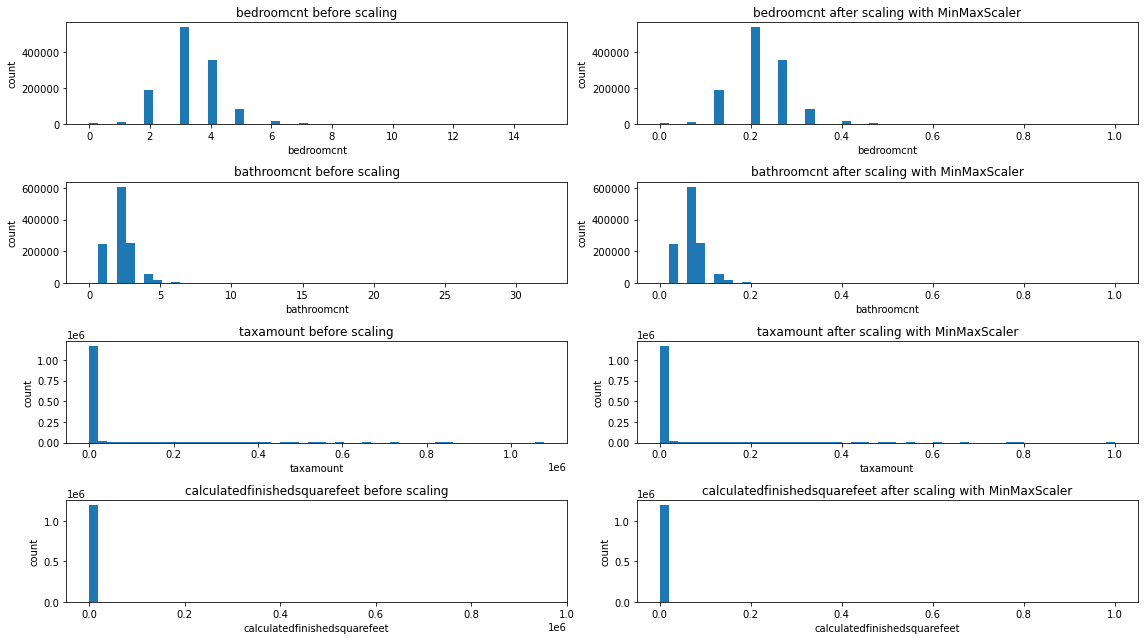

In [51]:
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

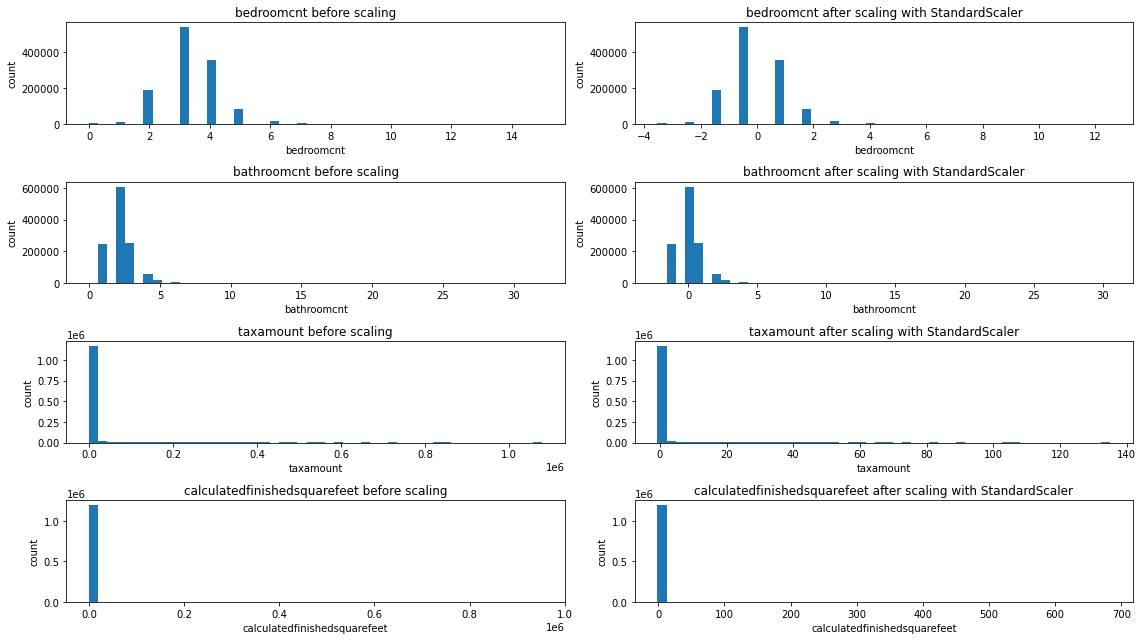

In [52]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

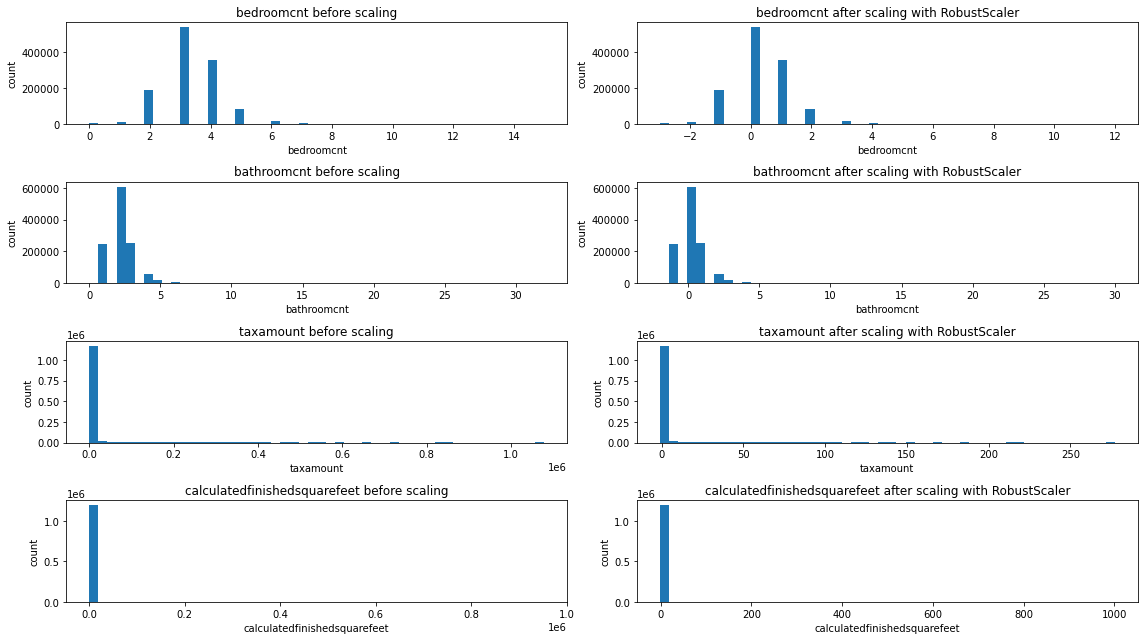

In [53]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

In [54]:
#2.
scaler = MinMaxScaler()
original_data = train[['taxamount']]
scaled_data = scaler.fit_transform(original_data)

In [55]:
scaled_data[:5]

array([[0.00250998],
       [0.01533538],
       [0.00423803],
       [0.00243856],
       [0.00587889]])

In [56]:
original_data[:5]

,taxamount
1567873,2712
1218138,16539
339661,4575
1017133,2635
40250,6344


In [57]:
scaler.inverse_transform(scaled_data)[:5]

array([[ 2712.],
       [16539.],
       [ 4575.],
       [ 2635.],
       [ 6344.]])

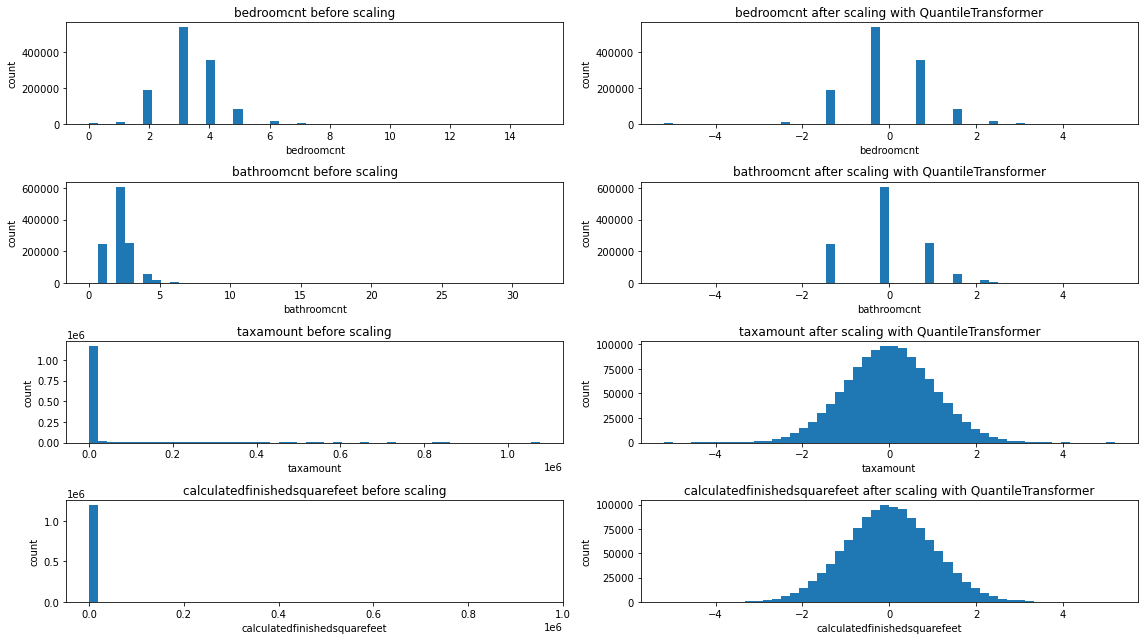

In [59]:
#3.
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

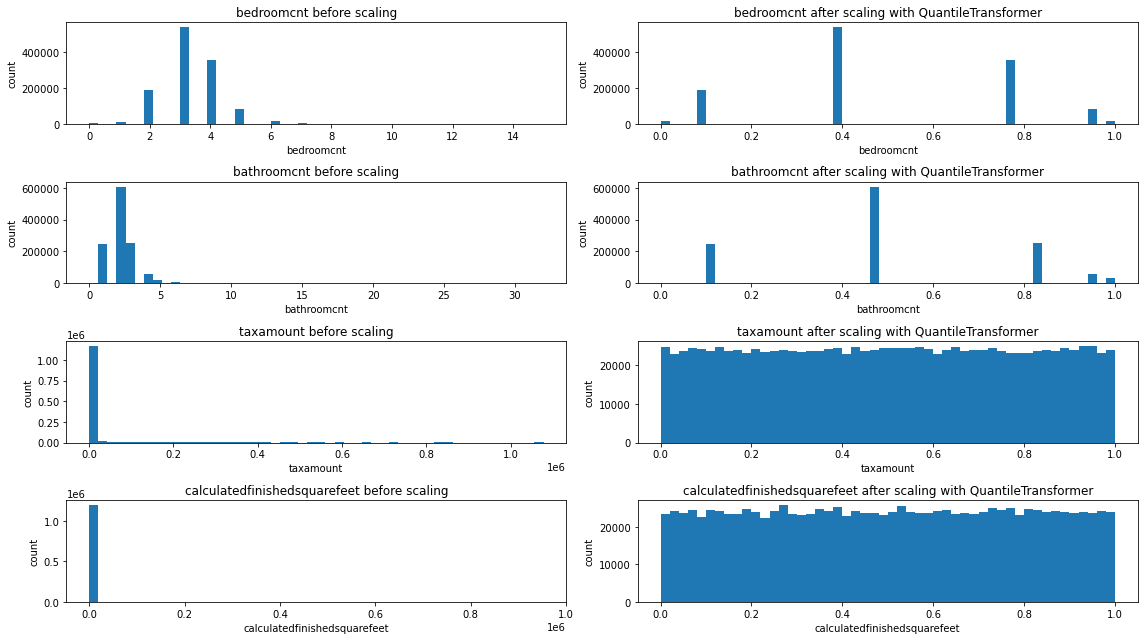

In [60]:
#4.
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

In [63]:
#5.
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedroomcnt', 'bathroomcnt', 'taxamount', 'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [64]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [65]:
scaler

MinMaxScaler()

In [66]:
train_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1567873,0.200000,0.03125,0.001309,191578,1950,0.002510,6037
1218138,0.133333,0.06250,0.001391,1345206,1950,0.015335,6037
339661,0.133333,0.03125,0.001104,356648,1953,0.004238,6037
1017133,0.200000,0.06250,0.001317,175069,1946,0.002439,6037
40250,0.200000,0.06250,0.001721,543000,1957,0.005879,6059
...,...,...,...,...,...,...,...
941799,0.133333,0.03125,0.000730,27699,1954,0.000846,6037
631585,0.200000,0.09375,0.002184,619590,1987,0.006783,6037
883917,0.200000,0.06250,0.001828,196237,1957,0.002324,6037
1253096,0.266667,0.09375,0.002168,617344,1924,0.007090,6037


In [67]:
validate_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
539361,0.200000,0.06250,0.001451,71604,1957,0.000915,6037
126612,0.133333,0.03125,0.001649,48719,1930,0.000485,6059
1590950,0.266667,0.09375,0.002021,438963,1969,0.004722,6059
1282025,0.266667,0.06250,0.002096,397233,1979,0.004359,6111
1420451,0.333333,0.12500,0.007184,2557712,1979,0.024221,6059
...,...,...,...,...,...,...,...
988389,0.200000,0.06250,0.001165,441000,1958,0.004881,6059
468006,0.133333,0.06250,0.000944,193642,1989,0.002611,6037
1026141,0.200000,0.09375,0.002996,325480,1978,0.003773,6037
1644940,0.200000,0.06250,0.001447,561558,1957,0.006066,6059


In [68]:
test_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
413974,0.200000,0.06250,0.001479,186697,1963,0.002556,6037
41333,0.133333,0.06250,0.002022,587421,1998,0.006668,6059
1796752,0.266667,0.09375,0.003456,796473,1992,0.008706,6059
1811458,0.200000,0.06250,0.001645,848481,1950,0.009563,6037
782643,0.266667,0.06250,0.001316,251385,1958,0.002897,6037
...,...,...,...,...,...,...,...
1320329,0.200000,0.06250,0.001200,432367,1952,0.004879,6037
1139341,0.266667,0.09375,0.002074,714000,1999,0.007504,6059
2062047,0.266667,0.06250,0.001776,174278,1978,0.002477,6037
1988667,0.266667,0.06250,0.001727,208583,1957,0.002503,6059
